In [44]:
!pip install openpyxl matplotlib

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
np.random.seed(1)
n = 100
dates = pd.date_range(start='2050-01-01', periods=n, freq='D')
products = np.random.choice(['Table', 'Camera', 'Phone', 'Microphone', 'Keyboard'], n)
prices =np.round(np.random.uniform(50.0, 200.0, n), 2)
quantities = np.random.randint(1, 15, n)

data = {
    'Date': dates, 
    'Product': products,
    'Price': prices, 
    'Quantity': quantities
}
df = pd.DataFrame(data)
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Table,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


In [47]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int32
dtype: object

In [48]:
df.to_csv('random_sales.csv', index=False)

In [49]:
df = pd.read_csv('random_sales.csv', parse_dates=['Date'])
df.head()

,Date,Product,Price,Quantity
0,2050-01-01,Microphone,147.16,7
1,2050-01-02,Keyboard,103.09,10
2,2050-01-03,Table,164.48,7
3,2050-01-04,Camera,103.48,1
4,2050-01-05,Microphone,162.92,1


In [50]:
df.dtypes

Date        datetime64[ns]
Product             object
Price              float64
Quantity             int64
dtype: object

In [51]:
df.to_excel('sales_data.xlsx')

In [52]:
df.to_json('sales_data.json')

In [53]:
df.shape

(100, 4)

In [54]:
df.describe().round(2)

,Date,Price,Quantity
count,100,100.00,100.00
mean,2050-02-19 12:00:00,117.32,7.79
min,2050-01-01 00:00:00,51.35,1.00
25%,2050-01-25 18:00:00,81.13,5.00
50%,2050-02-19 12:00:00,114.10,8.00
75%,2050-03-16 06:00:00,161.21,11.25
max,2050-04-10 00:00:00,197.26,14.00
std,NaN,42.47,4.03


In [55]:
df.values[:5]

array([[Timestamp('2050-01-01 00:00:00'), 'Microphone', 147.16, 7],
       [Timestamp('2050-01-02 00:00:00'), 'Keyboard', 103.09, 10],
       [Timestamp('2050-01-03 00:00:00'), 'Table', 164.48, 7],
       [Timestamp('2050-01-04 00:00:00'), 'Camera', 103.48, 1],
       [Timestamp('2050-01-05 00:00:00'), 'Microphone', 162.92, 1]],
      dtype=object)

In [56]:
product_sales = df.groupby('Product')['Quantity'].sum()
product_sales

Product
Camera        186
Keyboard      173
Microphone    106
Phone         124
Table         190
Name: Quantity, dtype: int64

In [57]:
average_prices = df.groupby('Product')['Price'].mean().round(2)
average_prices

Product
Camera        121.54
Keyboard      115.61
Microphone    129.43
Phone         123.47
Table         100.17
Name: Price, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

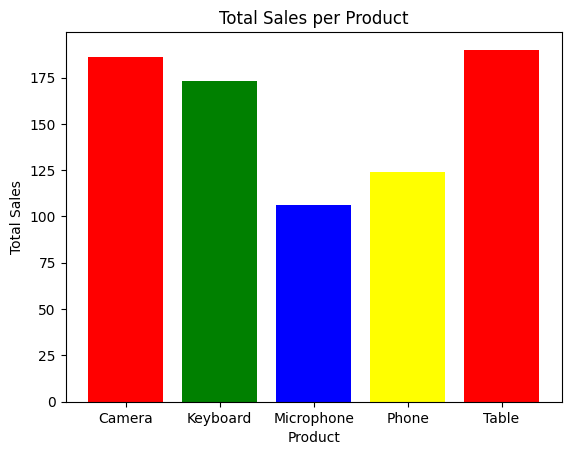

In [58]:
plt.bar(product_sales.index, product_sales.values, color=['red', 'green', 'blue', 'yellow'])
plt.title('Total Sales per Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

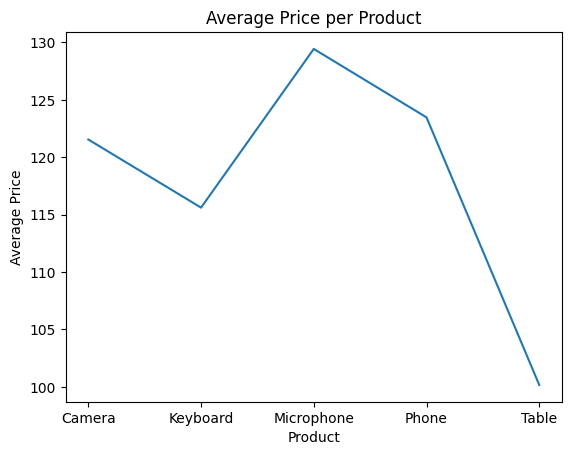

In [59]:
plt.plot(average_prices.index, average_prices.values)
plt.title('Average Price per Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.show